Projeto tendo como base código aberto em csv em que mostre os 05 países mais seguros para a comunidade homossexual, considerando política e direitos igualitários.

1 - Carregar o CSV diretamente da URL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

# URL do CSV
url = 'https://ourworldindata.org/grapher/lgbt-legal-equality-index.csv?v=1&csvType=full&useColumnShortNames=true'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    with open('lgbt_legal_equality_index.csv', 'wb') as file:
        file.write(response.content)
    print('Download concluído!')
else:
    print(f'Erro ao baixar: {response.status_code}')

Download concluído!


In [2]:
# Carregar os dados
dados = pd.read_csv('lgbt_legal_equality_index.csv')

# Remover espaços extras nos nomes das colunas (caso existam)
dados.columns = dados.columns.str.strip()

# Visualizar as primeiras linhas do dataset
print(dados.head())

        Entity Code  Year   ei_legal
0  Afghanistan  AFG  2024   0.000000
1       Africa  NaN  2024  20.723385
2      Albania  ALB  2024  62.270000
3      Algeria  DZA  2024   3.420000
4      Andorra  AND  2024  85.710000


2 - Verificar a estrutura do dataset

In [3]:
# Verificar informações básicas do dataset
print(dados.info())

# Verificar colunas
print(dados.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Entity    201 non-null    object 
 1   Code      195 non-null    object 
 2   Year      201 non-null    int64  
 3   ei_legal  201 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
None
Index(['Entity', 'Code', 'Year', 'ei_legal'], dtype='object')


3 - Analisar os dados e visualizar os resultados

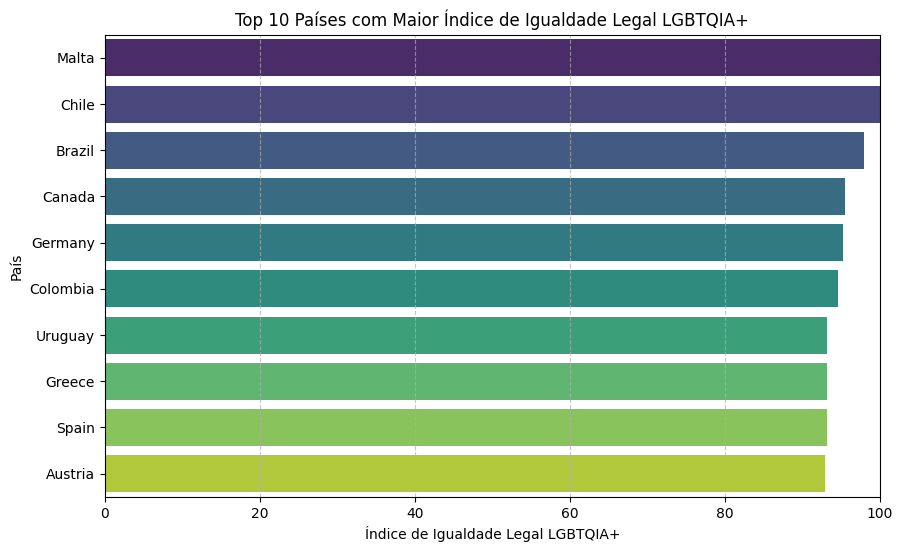

In [4]:
# Verificar se a coluna correta está presente
if 'ei_legal' in dados.columns:

  # Remover valores nulos
  dados = dados.dropna(subset=['ei_legal'])

  # Pegar apenas os dados mais recentes por país
  dados_mais_recentes = dados.sort_values(by=['Entity', 'Year'], ascending=[True, False]).drop_duplicates(subset=['Entity'])

  # Ordenar os países pelo índice de igualdade legal (do maior para o menor)
  dados_ordenados = dados_mais_recentes.sort_values(by='ei_legal', ascending=False)

# Visualizar os resultados

  # Selecionar os 10 países com maior índice de igualdade legal
  top_10_paises = dados_ordenados.head(10)

  # Criar o gráfico
  plt.figure(figsize=(10, 6))
  sns.barplot(data=top_10_paises, x='ei_legal', y='Entity', hue='Entity', palette='viridis', legend=False) #Remove a legenda, já que cada barra representa um país

  # Adicionar título e rótulos
  plt.xlabel('Índice de Igualdade Legal LGBTQIA+')
  plt.ylabel('País')
  plt.title('Top 10 Países com Maior Índice de Igualdade Legal LGBTQIA+')
  plt.xlim(0, 100)  # Supondo que o índice vai de 0 a 100
  plt.grid(axis='x', linestyle='--', alpha=0.7)

  # Mostrar o gráfico
  plt.show()

else:
  print('A coluna "ei_legal" não foi encontrada no dataset.')

4 - Salvar o dataset atualizado

In [6]:
# Salvar o dataset como CSV no Google Colab
dados.to_csv('lgbt_legal_equality_index.csv', index=False)

Criar um modelo de Machine Learning - predição é binária ("seguro" ou "não seguro")

In [7]:
# Preparar os Dados
import pandas as pd
import numpy as np

# Carregar os dados
dados = pd.read_csv('lgbt_legal_equality_index.csv')

# Remover espaços extras nos nomes das colunas (caso existam)
dados.columns = dados.columns.str.strip()

# Selecionar apenas os dados mais recentes por país
dados = dados.sort_values(by=['Entity', 'Year'], ascending=[True, False]).drop_duplicates(subset=['Entity'])

# Remover valores nulos
dados = dados.dropna(subset=['ei_legal'])

# Criar a variável-alvo (país seguro ou não)
dados['seguro'] = np.where(dados['ei_legal'] >= 70, 1, 0) #1 = Seguro, 0 = Não seguro

# Selecionar colunas para análise
dados = dados[['Entity', 'ei_legal', 'seguro']] #Adicionar mais variáveis preditoras aqui se disponíveis

# Exibir amostra dos dados
print(dados.head())

        Entity   ei_legal  seguro
0  Afghanistan   0.000000       0
1       Africa  20.723385       0
2      Albania  62.270000       0
3      Algeria   3.420000       0
4      Andorra  85.710000       1


In [8]:
# Criar e Treinar o Modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar variáveis preditoras e alvo
X = dados[['ei_legal']]  # Adicionar mais colunas aqui se houver mais dados
y = dados['seguro']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         8

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [9]:
# Fazer Predições para um País Específico

def prever_seguranca(pais, modelo, dados):
    if pais not in dados['Entity'].values:
        return f'Erro: O país "{pais}" não está no dataset.'

    # Obter os dados do país
    info_pais = dados[dados['Entity'] == pais]
    valor_ei_legal = info_pais['ei_legal'].values[0]

    # Fazer a predição
    previsao = modelo.predict([[valor_ei_legal]])[0]

    # Exibir resultado
    status = 'Seguro 🏳️‍🌈✅' if previsao == 1 else 'Não seguro ❌'
    return f'Previsão para {pais}: {status} (Índice de Igualdade: {valor_ei_legal})'

# Testar a função com um país específico
print(prever_seguranca('Canada', modelo, dados))

Previsão para Canada: Seguro 🏳️‍🌈✅ (Índice de Igualdade: 95.46)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Testar a função com um país específico
print(prever_seguranca('Chile', modelo, dados))

Previsão para Chile: Seguro 🏳️‍🌈✅ (Índice de Igualdade: 100.0)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
# Testar a função com um país específico
print(prever_seguranca('Brazil', modelo, dados))

Previsão para Brazil: Seguro 🏳️‍🌈✅ (Índice de Igualdade: 97.96)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
# Testar a função com um país específico
print(prever_seguranca('Africa', modelo, dados))

Previsão para Africa: Não seguro ❌ (Índice de Igualdade: 20.723385)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
